Pareto Front Method

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

random.seed(42)
np.random.seed(42)
df = pd.read_csv('data.csv')
x_coords = df['XCOORD'].tolist()
y_coords = df['YCOORD'].tolist()
profit = [random.randint(1, 50) for _ in range(101)]
num_customers = len(df)
distance_matrix = np.zeros((num_customers, num_customers))

for i in range(num_customers):
    for j in range(num_customers):
        if i != j:
            distance_matrix[i][j] = np.sqrt((x_coords[i] - x_coords[j]) ** 2 + (y_coords[i] - y_coords[j]) ** 2)

def calculate_profit(individual):
    profit_sum = 0
    for order, index in enumerate(individual):
        profit_sum += profit[index] * (1 - order / 101)
        # profit_sum += profit[index]
    return profit_sum


def calculate_distance(individual):
    total_distance = 0
    for i in range(len(individual) - 1):
        total_distance += distance_matrix[individual[i]][individual[i + 1]]
    total_distance += distance_matrix[individual[-1]][individual[0]]
    return total_distance

def mul_obj_tsp(individual):
    return calculate_distance(individual), calculate_profit(individual)

In [9]:
# Create a multi-objective fitness class
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, 1.0))

# Create an individual class containing the tour and profits
creator.create("Individual", list, fitness=creator.FitnessMulti)
toolbox = base.Toolbox()

# Define a function to generate a random permutation of cities as the tour
toolbox.register("indices", random.sample, range(num_customers), num_customers)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", mul_obj_tsp)

# Define genetic operators
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selNSGA2)

E:\Anaconda3\envs\torch\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
E:\Anaconda3\envs\torch\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [10]:
population = toolbox.population(n=800)

# Evaluate the entire population
fitnesses = map(toolbox.evaluate, population)
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

num_generations = 1000
cxpb, mutpb = 0.7, 0.2

algorithms.eaMuPlusLambda(population, toolbox, mu=100, lambda_=200, cxpb=cxpb, mutpb=mutpb, ngen=num_generations, stats=None,   
                          halloffame=None, verbose=True)

pareto_front = tools.sortNondominated(population, len(population), first_front_only=True)[0]

gen	nevals
0  	0     
1  	180   
2  	183   
3  	173   
4  	180   
5  	185   
6  	185   
7  	174   
8  	180   
9  	185   
10 	185   
11 	180   
12 	188   
13 	177   
14 	182   
15 	183   
16 	172   
17 	173   
18 	171   
19 	173   
20 	175   
21 	182   
22 	181   
23 	181   
24 	184   
25 	184   
26 	181   
27 	176   
28 	167   
29 	180   
30 	179   
31 	181   
32 	173   
33 	186   
34 	179   
35 	179   
36 	183   
37 	167   
38 	179   
39 	180   
40 	185   
41 	170   
42 	178   
43 	181   
44 	176   
45 	179   
46 	180   
47 	182   
48 	190   
49 	179   
50 	172   
51 	176   
52 	179   
53 	180   
54 	177   
55 	174   
56 	183   
57 	180   
58 	176   
59 	183   
60 	180   
61 	184   
62 	180   
63 	180   
64 	181   
65 	183   
66 	184   
67 	178   
68 	182   
69 	176   
70 	174   
71 	181   
72 	184   
73 	179   
74 	181   
75 	184   
76 	183   
77 	180   
78 	176   
79 	187   
80 	186   
81 	179   
82 	179   
83 	174   
84 	172   
85 	180   
86 	173   
87 	183   
88 	187   
89 	185   

IndexError: tuple index out of range

In [11]:
for ind in pareto_front:
    print("Distance:", ind.fitness.values[0], "Profit:", ind.fitness.values[1])

Distance: 883.777264589505 Profit: 1271.1683168316827
Distance: 1423.5146562164016 Profit: 1666.7821782178223
Distance: 982.318059206722 Profit: 1474.584158415841
Distance: 918.0186703967853 Profit: 1445.3168316831695
Distance: 918.0186703967852 Profit: 1374.831683168316
Distance: 918.0186703967852 Profit: 1374.831683168316
Distance: 918.0186703967852 Profit: 1374.831683168316
Distance: 884.8880763114829 Profit: 1331.4950495049502
Distance: 884.8880763114829 Profit: 1331.4950495049502
Distance: 884.8880763114829 Profit: 1331.4950495049502
Distance: 884.8880763114829 Profit: 1331.4950495049502
Distance: 1124.9031347684909 Profit: 1606.7128712871292
Distance: 988.2283810180077 Profit: 1516.9504950495048
Distance: 951.3401961201407 Profit: 1460.3366336633671
Distance: 1013.510201534118 Profit: 1552.3366336633658
Distance: 1056.1651950769947 Profit: 1575.5049504950496
Distance: 1329.3123834440096 Profit: 1663.722772277227
Distance: 1088.185959622049 Profit: 1603.7722772277225
Distance: 108

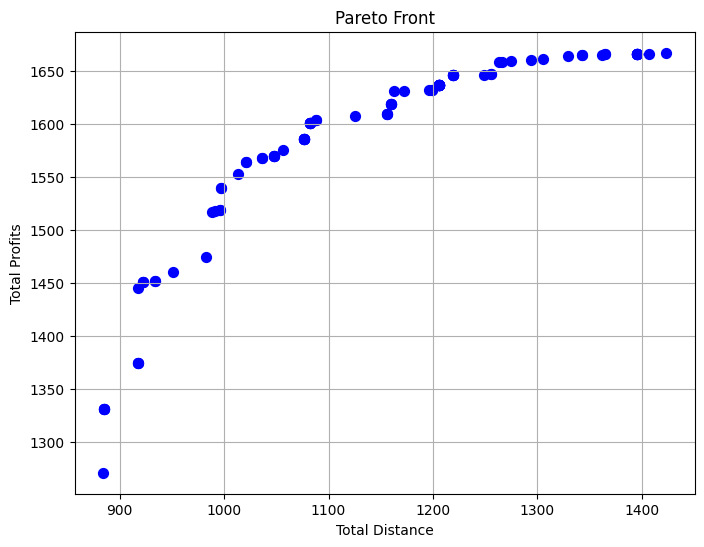

In [13]:
import matplotlib.pyplot as plt

distances = [ind.fitness.values[0] for ind in pareto_front]
profits = [ind.fitness.values[1] for ind in pareto_front]

plt.figure(figsize=(8, 6))
plt.scatter(distances, profits, c='blue', marker='o', s=50)
plt.xlabel('Total Distance')
plt.ylabel('Total Profits')
plt.title('Pareto Front')
plt.grid(True)
plt.savefig('fig10.png')
plt.show()